# 01.01 - PROYECTO KAGGLE

download data directly from Kaggle
create a file kaggle.json with your authentication token (in kaggle → click user icon on top-right → settings → API create new token)
upload it to this notebook workspace
run the following cell

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


## unzip and inspect data

In [ ]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


load train.csv data with pandas

In [ ]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 12)


El archivo CSV llamado dataframe contiene 692,500 filas, es decir, tiene 692,500 registros u observaciones.
12 columnas: Cada registro tiene 12 atributos o variables.
Esto indica que el archivo train.csv contiene una gran cantidad de datos, con 692,500 ejemplos, cada uno descrito por 12 variables diferentes.

In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Acá vemos las primeras 5 filas del dataframe z, es decir, una muestra de los datos cargados para inspeccionarlos, con sus respectivas columnas.

In [ ]:
# Contar el número de estudiantes en cada programa académico
estudiantes_por_programa = z['ESTU_PRGM_ACADEMICO'].value_counts()

# Mostrar los resultados
print(estudiantes_por_programa)

ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64


In [ ]:
# Contar el número de estudiantes por departamento/localidad
estudiantes_por_departamento = z['ESTU_PRGM_DEPARTAMENTO'].value_counts()

# Mostrar los resultados
print(estudiantes_por_departamento)

ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64


In [ ]:
# Contar estudiantes agrupados por programa académico y departamento
estudiantes_por_programa_y_departamento = z.groupby(['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO']).size()

# Mostrar los resultados
print(estudiantes_por_programa_y_departamento)

ESTU_PRGM_ACADEMICO                             ESTU_PRGM_DEPARTAMENTO
3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES  ANTIOQUIA                  69
ACTIVIDAD FISICA Y DEPORTE                      ANTIOQUIA                 162
ACUICULTURA                                     CORDOBA                    79
ADMINISTRACION                                  BOLIVAR                   100
                                                CESAR                      17
                                                                         ... 
ZOOTECNIA                                       NORTE SANTANDER           207
                                                RISARALDA                 127
                                                SANTANDER                  81
                                                SUCRE                     100
                                                VALLE                      82
Length: 2370, dtype: int64


In [ ]:
# Contar estudiantes según las horas trabajadas por semana
estudiantes_por_horas_trabajadas = z['ESTU_HORASSEMANATRABAJA'].value_counts()

# Mostrar los resultados
print(estudiantes_por_horas_trabajadas)

ESTU_HORASSEMANATRABAJA
1.000000    280209
0.000000    116550
0.714286     92693
0.142857     87191
Name: count, dtype: int64


In [ ]:
# Crear una tabla cruzada de estudiantes por programa académico y estrato socioeconómico
tabla_cruzada = pd.crosstab(z['ESTU_PRGM_ACADEMICO'], z['FAMI_ESTRATOVIVIENDA'])

# Mostrar los resultados
print(tabla_cruzada)


FAMI_ESTRATOVIVIENDA                               1     2     3    4    5   6
ESTU_PRGM_ACADEMICO                                                           
3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES     1    21    35   10    2   0
ACTIVIDAD FISICA Y DEPORTE                         9    45    68   31    8   1
ACUICULTURA                                       52    22     4    0    0   1
ADMINISTRACION                                    10    26    40   31    5   5
ADMINISTRACION  FINANCIERA                        14    16    18   18    5   3
...                                              ...   ...   ...  ...  ...  ..
TRABAJO SOCIAL                                  3740  5379  2916  484  123  44
TRADUCCION INGLES-FRANCES-ESPAÑOL                  2    14    26   16    9   1
TURISMO                                           34   119    61    8    0   0
URBANISMO                                          0     0     4    3    0   0
ZOOTECNIA                                        378

In [ ]:
# Contar estudiantes por nivel de rendimiento global
rendimiento_estudiantes = z['RENDIMIENTO_GLOBAL'].value_counts()

# Mostrar los resultados
print(rendimiento_estudiantes)

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


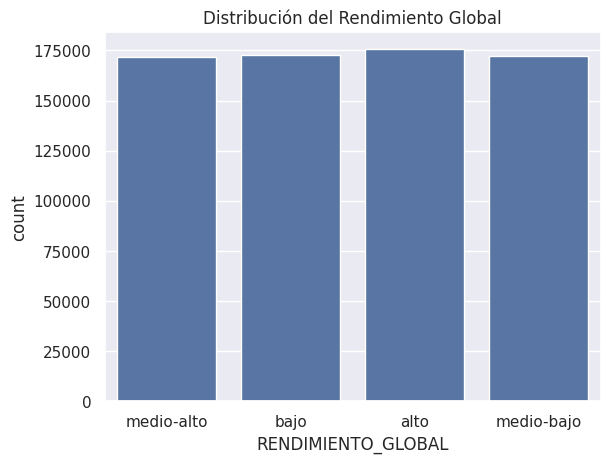

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para rendimiento global
sns.countplot(data=z, x='RENDIMIENTO_GLOBAL')
plt.title('Distribución del Rendimiento Global')
plt.show()

RENDIMIENTO_GLOBAL     alto   bajo  medio-alto  medio-bajo
FAMI_ESTRATOVIVIENDA                                      
1                     14363  42388       23643       31597
2                     53448  74761       67555       72333
3                     59121  42756       56841       51967
4                     28624   9064       16154       11672
5                     12415   2731        5112        3350
6                      7648   1287        2314        1356


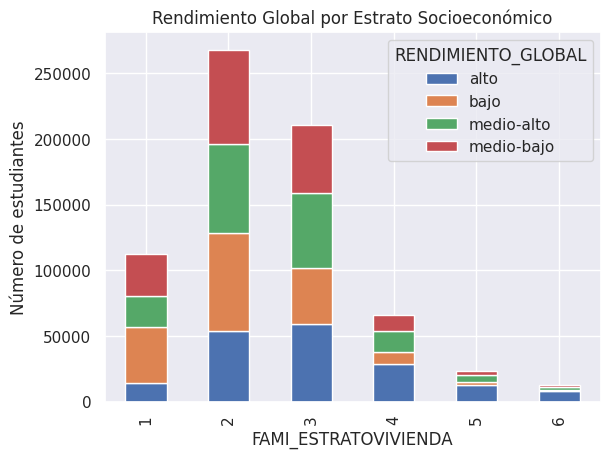

In [ ]:
# Crear una tabla cruzada entre estrato socioeconómico y rendimiento global
rendimiento_por_estrato = pd.crosstab(z['FAMI_ESTRATOVIVIENDA'], z['RENDIMIENTO_GLOBAL'])

# Mostrar los resultados
print(rendimiento_por_estrato)

# Visualización del resultado
rendimiento_por_estrato.plot(kind='bar', stacked=True)
plt.title('Rendimiento Global por Estrato Socioeconómico')
plt.ylabel('Número de estudiantes')
plt.show()


# CONSULTAR DATOS FALTANTES

## Necesitamos identificar cuáles son los datos faltantes con el fin de decidir qué columnas podemos eliminar o imputar



In [ ]:
z.isnull().sum()


,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


Valores faltantes
Acá identificaremos las columnas del DataFrame que contengan valores faltantes (NaN)

In [ ]:
# Identificar columnas con valores faltantes en z
k = z.isna().sum()
print(k[k != 0])


ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
dtype: int64


# INSPECCIONAR LA VARIABLE OBJETIVO


Utilizaremos Seaborn para crear un gráfico de distribución (displot) de la columna RENDIMIENTO_GLOBAL, con el fin de generar un gráfico de barras para visualizar la distribución de la variable categórica 'RENDIMIENTO_GLOBAL'.

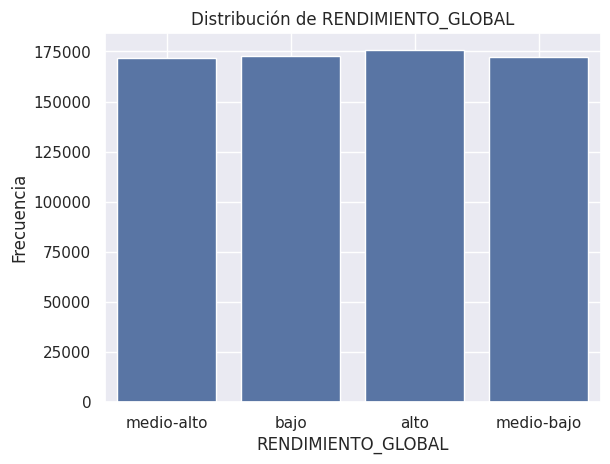

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un gráfico de barras para la variable rendimiento global
sns.countplot(x=z['RENDIMIENTO_GLOBAL'])  # Gráfico de conteo para variables categóricas
plt.title('Distribución de RENDIMIENTO_GLOBAL')
plt.xlabel('RENDIMIENTO_GLOBAL')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



# DESCUBRIR LOS TIPOS DE DATOS

## Para descubrir los tipos de datos de las columnas del DataFrame y ver qué columnas están presentes, utilizaremos el método dtypes junto con columns para obtener información completa sobre las columnas y sus tipos

In [ ]:
# Mostrar todas las columnas del DataFrame z
print(z.columns)

# Mostrar los tipos de datos de cada columna en el DataFrame z
print("\nTipos de datos de cada columna:")
print(z.dtypes)


Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

Tipos de datos de cada columna:
ID                                 int64
PERIODO                            int64
ESTU_PRGM_ACADEMICO               object
ESTU_PRGM_DEPARTAMENTO            object
ESTU_VALORMATRICULAUNIVERSIDAD    object
ESTU_HORASSEMANATRABAJA           object
FAMI_ESTRATOVIVIENDA              object
FAMI_TIENEINTERNET                object
FAMI_EDUCACIONPADRE               object
FAMI_EDUCACIONMADRE               object
ESTU_PAGOMATRICULAPROPIO          object
RENDIMIENTO_GLOBAL                object
dtype: object


#Identificar los valores de la columna FAMI_ESTRATOVIVIENDA

## Identifiquemos qué valores están presentes en la columna que podrían estar causando problemas


In [ ]:
# Ver todos los valores únicos en la columna FAMI_ESTRATOVIVIENDA
print(z['FAMI_ESTRATOVIVIENDA'].unique())


['Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 2' 'Estrato 1' nan
 'Estrato 6' 'Sin Estrato']


# Imputar los valores faltantes en la columna FAMI_ESTRATOVIVIENDA con la moda (el valor más frecuente)

In [ ]:
# Obtener la moda de la columna 'FAMI_ESTRATOVIVIENDA'
moda_estrato = z['FAMI_ESTRATOVIVIENDA'].mode()[0]

# Rellenar los valores faltantes con la moda
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].fillna(moda_estrato)

# Verificar si hay valores faltantes después de la imputación
print(z['FAMI_ESTRATOVIVIENDA'].isnull().sum())



0


# Contamos los valores únicos para ver cuáles son los nuevos valores con los que quedó la columna

In [ ]:
# Contar los valores únicos en la columna 'FAMI_ESTRATOVIVIENDA'
valores_unicos = z['FAMI_ESTRATOVIVIENDA'].value_counts()
print("Valores únicos en FAMI_ESTRATOVIVIENDA:")
print(valores_unicos)

Valores únicos en FAMI_ESTRATOVIVIENDA:
FAMI_ESTRATOVIVIENDA
Estrato 2      264808
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64


# Distribuir los valores de "Sin Estrato" en la columna FAMI_ESTRATOVIVIENDAsegún la moda de los estratos existentes

Calcular la moda : Determina cuál es la moda (el valor más frecuente) en la columna FAMI_ESTRATOVIVIENDA.

Reemplazar "Sin Estrato" : Asigna la moda a los valores de "S

Revisar los resultados : Verifica cómo quedó la columna después de la imputación.

In [ ]:
import pandas as pd

# Supongamos que 'z' es tu DataFrame y ya has manejado los valores faltantes previamente.
# Calcular la moda de los valores existentes en la columna FAMI_ESTRATOVIVIENDA
moda_estrato = z['FAMI_ESTRATOVIVIENDA'].mode()[0]

# Reemplazar "Sin Estrato" por la moda
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].replace('Sin Estrato', moda_estrato)

# Verificar los resultados
print(z['FAMI_ESTRATOVIVIENDA'].value_counts())


FAMI_ESTRATOVIVIENDA
Estrato 2    268097
Estrato 3    210685
Estrato 1    111991
Estrato 4     65514
Estrato 5     23608
Estrato 6     12605
Name: count, dtype: int64


# Imputar el resto de valores faltantes con la Moda:

Utilizamos la moda para rellenar el resto de valores faltantes, debido a que las columnas que no tienen datos hasta este punto son categóricas. Para ello haremos un bucle for para iterar sobre todas las columnas del DataFrame.
Comprobar valores faltantes : Usamos isnull().any()para verificar si hay valores faltantes en la columna.
Calcular la moda : mode()[0]obtiene la moda de la columna.[0]para asegurarnos de obtener solo el primer valor en caso de que haya más de uno.
Rellenar valores faltantes : Usamos fillna(moda, inplace=True)para reemplazar los valores faltantes con la moda calculada.
Verificar resultados : Al final, se muestra el número de valores nulos en cada columna para asegurarte de que todos los valores faltantes se han rellenado.

In [ ]:
import pandas as pd

# Recorrer cada columna del DataFrame
for column in z.columns:
    # Verificar si hay valores faltantes en la columna
    if z[column].isnull().any():
        # Calcular la moda de la columna
        moda = z[column].mode()[0]  # [0] para obtener el primer valor de la moda
        # Rellenar los valores faltantes con la moda (sin usar inplace)
        z[column] = z[column].fillna(moda)

# Verificar el resultado
print(z.isnull().sum())  # Esto mostrará el número de valores nulos en cada columna



ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_EDUCACIONMADRE               0
ESTU_PAGOMATRICULAPROPIO          0
RENDIMIENTO_GLOBAL                0
dtype: int64


# Convertir la columna FAMI_ESTRATOVIVIENDA, que actualmente contiene etiquetas categóricas como "Estrato 1", "Estrato 2", etc., en valores numéricos

Diccionario de Mapeo : Se crea un diccionario llamado mapeo_estrato que asigna cada etiqueta categórica a un valor numérico correspondiente.
Reemplazo de Valores : Utilizando replace(), se reemplazan las etiquetas en la columna FAMI_ESTRATOVIVIENDA por sus valores numéricos.
Verificación : Se imprimen las primeras filas de la columna para confirmar que la conversión se realizó correctamente

In [ ]:
import pandas as pd

# Establecer opción para evitar el FutureWarning
pd.set_option('future.no_silent_downcasting', True)

# Definir un diccionario de mapeo para convertir las etiquetas a números
mapeo_estrato = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0  # Asignar 0 a 'Sin Estrato' si así lo deseas
}

# Reemplazar las etiquetas con los valores numéricos
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].replace(mapeo_estrato)

# Verificar el resultado
print(z['FAMI_ESTRATOVIVIENDA'].head())  # Mostrar las primeras filas para verificar



0    3
1    3
2    3
3    4
4    3
Name: FAMI_ESTRATOVIVIENDA, dtype: object


# Convertir las descripciones de horas trabajadas en la columna ESTU_HORASSEMANATRABAJA a valores numéricos

Paso 1: Definir el Diccionario de Mapeo que asocia cada descripción de horas trabajadas a su valor numérico correspondiente.

Paso 2: Reemplazar las Descripciones a través del método replace() para reemplazar las descripciones en la columna ESTU_HORASSEMANATRABAJA con los valores numéricos.

In [ ]:
## Definir un diccionario de mapeo para convertir las descripciones a valores numéricos
mapeo_horas_trabajadas = {
    'Menos de 10 horas': 5,
    'Entre 21 y 30 horas': 25,
    'Más de 30 horas': 35
}

# Reemplazar las descripciones con los valores numéricos
z['ESTU_HORASSEMANATRABAJA'] = z['ESTU_HORASSEMANATRABAJA'].replace(mapeo_horas_trabajadas)

# Verificar el resultado
print(z['ESTU_HORASSEMANATRABAJA'].head())  # Mostrar las primeras filas para verificar



0     5
1     0
2    35
3     0
4    25
Name: ESTU_HORASSEMANATRABAJA, dtype: object


In [ ]:
# Convertir la columna a tipo numérico
z['ESTU_HORASSEMANATRABAJA'] = pd.to_numeric(z['ESTU_HORASSEMANATRABAJA'], errors='coerce')


# Modificar los datos de la Columna ESTU_VALORMATRICULAUNIVERSIDAD:

## Convierta los rangos de valores en esta columna a números representativos.


In [ ]:
# Imprimir los valores únicos de la columna ESTU_VALORMATRICULAUNIVERSIDAD
valores_unicos = z['ESTU_VALORMATRICULAUNIVERSIDAD'].unique()
print(valores_unicos)


['Entre 5.5 millones y menos de 7 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones' 'Más de 7 millones'
 'Entre 1 millón y menos de 2.5 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'No pagó matrícula']


Con base en los valores de la columna ESTU_VALORMATRICULAUNIVERSIDAD, convertimos las descripciones a valores numéricos representativos:

Paso 1: Definir el mapa
Vamos a asignar un valor numérico representativo para cada rango:

"Menos de 500 mil" → 250000
"Entre 500 mil y menos de 1 millón" → 750000
"Entre 1 millón y menos de 2,5 millones" → 1750000
"Entre 2,5 millones y menos de 4 millones" → 3250000
"Entre 4 millones y menos de 5,5 millones" → 4500000
"Entre 5,5 millones y menos de 7 millones" → 6500000
"Más de 7 millones" → 8000000 (puedes elegir un valor que represente mejor este rango)
"No pagué matrícula" → 0

In [ ]:
# Definir un diccionario de mapeo para convertir las descripciones a valores numéricos
mapeo_matricula = {
    'Menos de 500 mil': 250000,
    'Entre 500 mil y menos de 1 millón': 750000,
    'Entre 1 millón y menos de 2.5 millones': 1750000,
    'Entre 2.5 millones y menos de 4 millones': 3250000,
    'Entre 4 millones y menos de 5.5 millones': 4500000,
    'Entre 5.5 millones y menos de 7 millones': 6500000,
    'Más de 7 millones': 8000000,
    'No pagó matrícula': 0
}
# Reemplazar las descripciones con los valores numéricos
z['ESTU_VALORMATRICULAUNIVERSIDAD'] = z['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(mapeo_matricula)

# Verificar el resultado
print(z['ESTU_VALORMATRICULAUNIVERSIDAD'].head())  # Mostrar las primeras filas para verificar

# Imprimir los valores únicos en la columna para verificar
print(z['ESTU_VALORMATRICULAUNIVERSIDAD'].unique())


0    6500000
1    3250000
2    3250000
3    4500000
4    3250000
Name: ESTU_VALORMATRICULAUNIVERSIDAD, dtype: object
[6500000 3250000 4500000 8000000 1750000 750000 250000 0]


In [ ]:
# Convertir la columna a numérico, forzando la conversión y manejando errores
z['ESTU_VALORMATRICULAUNIVERSIDAD'] = pd.to_numeric(z['ESTU_VALORMATRICULAUNIVERSIDAD'], errors='coerce')

# Verificar el resultado
print(z['ESTU_VALORMATRICULAUNIVERSIDAD'].head())


0    6500000
1    3250000
2    3250000
3    4500000
4    3250000
Name: ESTU_VALORMATRICULAUNIVERSIDAD, dtype: int64


In [ ]:
# Ver las primeras filas de la columna
print(z['RENDIMIENTO_GLOBAL'].head())

# Verificar el conteo de valores nulos
print(z['RENDIMIENTO_GLOBAL'].isnull().sum())


0    medio-alto
1          bajo
2          bajo
3          alto
4    medio-bajo
Name: RENDIMIENTO_GLOBAL, dtype: object
0


# Inspeccionar las columnas numéricas



In [ ]:
# Inspeccionar las columnas numéricas del DataFrame z
z._get_numeric_data().describe().T


,count,mean,std,min,25%,50%,75%,max
ID,692500.0,4.946061e+05,2.855852e+05,1.0,247324.75,494564.5,741782.5,989286.0
PERIODO,692500.0,2.019837e+04,1.053504e+01,20183.0,20195.00,20195.0,20203.0,20213.0
ESTU_VALORMATRICULAUNIVERSIDAD,692500.0,2.843952e+06,2.351647e+06,0.0,750000.00,1750000.0,4500000.0,8000000.0
ESTU_HORASSEMANATRABAJA,576643.0,2.178227e+01,1.500151e+01,0.0,5.00,25.0,35.0,35.0


# Aplicación de One-Hot Encoding a la columna RENDIMIENTO_GLOBALy unión al DataFrame original

Convertimos la columna categórica RENDIMIENTO_GLOBA Ldel DataFrame z en múltiples columnas binarias (una por cada categoría) utilizando la técnica de One-Hot Encoding . Cada nueva columna 0y 1para indicar la presencia de esa categoría en la fila correspondiente.

Codificación One-Hot : Se aplica a la columna RENDIMIENTO_GLOBALpara crear un nuevo DataFrame ( one_hot_rendimiento) donde cada categoría única de RENDIMIENTO_GLOBALes convertida en una'RENDIMIENTO_'.
Unión de DataFrames : El DataFrame original zse amplía mediante la unión ( join) del nuevo DataFrame que contiene las columnas generadas por el One-Hot Encoding.


In [ ]:
import pandas as pd


# Aplicar One-Hot Encoding a la columna 'RENDIMIENTO_GLOBAL'
one_hot_rendimiento = pd.get_dummies(z['RENDIMIENTO_GLOBAL'], prefix='RENDIMIENTO')

# Unir el DataFrame original con el nuevo DataFrame de One-Hot Encoding
z = z.join(one_hot_rendimiento)

# Verifica los resultados
print(z.head())


       ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212                  ENFERMERIA                 BOGOTÁ   
1  645256    20212                     DERECHO              ATLANTICO   
2  308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTÁ   
3  470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4  989032    20212                  PSICOLOGIA              ANTIOQUIA   

   ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                         6500000                      5.0   
1                         3250000                      0.0   
2                         3250000                     35.0   
3                         4500000                      0.0   
4                         3250000                     25.0   

  FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET                 FAMI_EDUCACIONPADRE  \
0                    3                 Si    Técnica o tecnológica incompleta   
1                    3    

# Estandarización de horas trabajadas a la semana

Realizamos el proceso de estandarización de la columna `ESTU_HORASESTU_HORASSEMANATRABAJAen el DataFrame z, con el objetivo de escalar los valores

Cálculo de valores mínimos y máximos :

Se obtiene el valor mínimo ( min_horas) y máximo ( max_horas) de la columna ESTU_HORASSEMANATRABAJA para utilizarlos en la fórmula de estandarización.



In [ ]:
import pandas as pd

# Calcular el valor mínimo y máximo de la columna ESTU_HORASSEMANATRABAJA
min_horas = z['ESTU_HORASSEMANATRABAJA'].min()
max_horas = z['ESTU_HORASSEMANATRABAJA'].max()

# Estandarizar la columna
z['ESTU_HORASSEMANATRABAJA'] = (z['ESTU_HORASSEMANATRABAJA'] - min_horas) / (max_horas - min_horas)

# Mostrar las primeras filas para verificar
print(z['ESTU_HORASSEMANATRABAJA'].head())


0    0.142857
1    0.000000
2    1.000000
3    0.000000
4    0.714286
Name: ESTU_HORASSEMANATRABAJA, dtype: float64


In [ ]:
# Mostrar de nuevo los tipos de datos de todas las columnas del DataFrame z
print(z.dtypes)



ID                                  int64
PERIODO                             int64
ESTU_PRGM_ACADEMICO                object
ESTU_PRGM_DEPARTAMENTO             object
ESTU_VALORMATRICULAUNIVERSIDAD      int64
ESTU_HORASSEMANATRABAJA           float64
FAMI_ESTRATOVIVIENDA               object
FAMI_TIENEINTERNET                 object
FAMI_EDUCACIONPADRE                object
FAMI_EDUCACIONMADRE                object
ESTU_PAGOMATRICULAPROPIO           object
RENDIMIENTO_GLOBAL                 object
RENDIMIENTO_alto                     bool
RENDIMIENTO_bajo                     bool
RENDIMIENTO_medio-alto               bool
RENDIMIENTO_medio-bajo               bool
dtype: object


Exploramos visualmente la relación entre el rendimiento académico de los estudiantes y otros factores como el valor de la matrícula universitaria, las horas trabajadas semanalmente y el estrato socioeconómico de la vivienda. Este tipo de análisis puede ayudar a identificar patrones, correlaciones, etc.

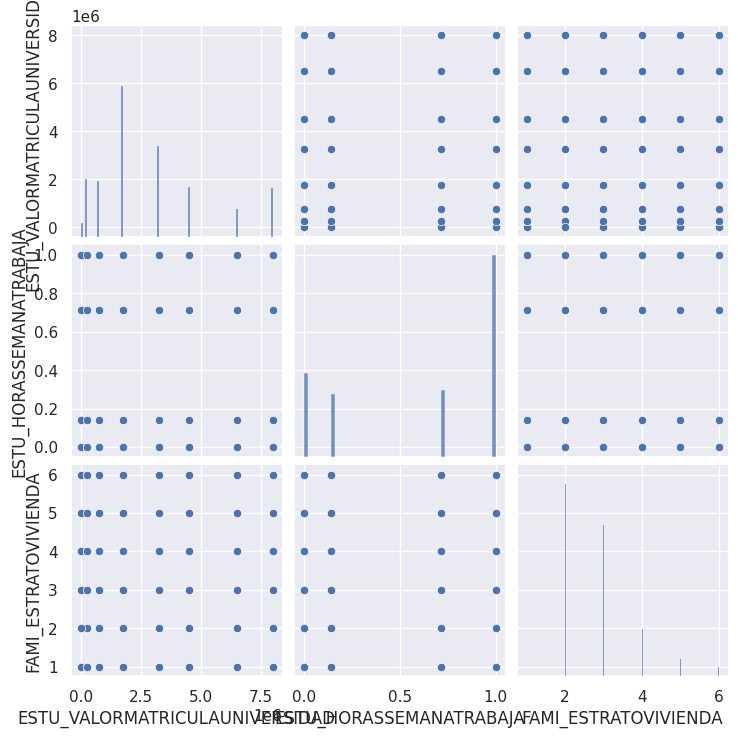

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar las columnas numéricas junto con la variable de interés 'RENDIMIENTO_GLOBAL'
cols = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']

# Configurar el estilo de Seaborn
sns.set()

# Crear el pairplot para las columnas seleccionadas
sns.pairplot(z[cols])

# Mostrar el gráfico
plt.show()




# Matriz de correlación
Seleccionamos todas las columnas numéricas (tipos int64y float64) del DataFrame z, calcula la matriz de correlación entre esas columnas utilizando el método .corr(), y luego visualiza esta matriz en forma de un mapa de calor o mapa de calor. El mapa de calor se genera utilizando Seaborn ( sns.heatmap), con anotaciones para mostrar l'coolwarm'Para destacar las relacionesplt.show()

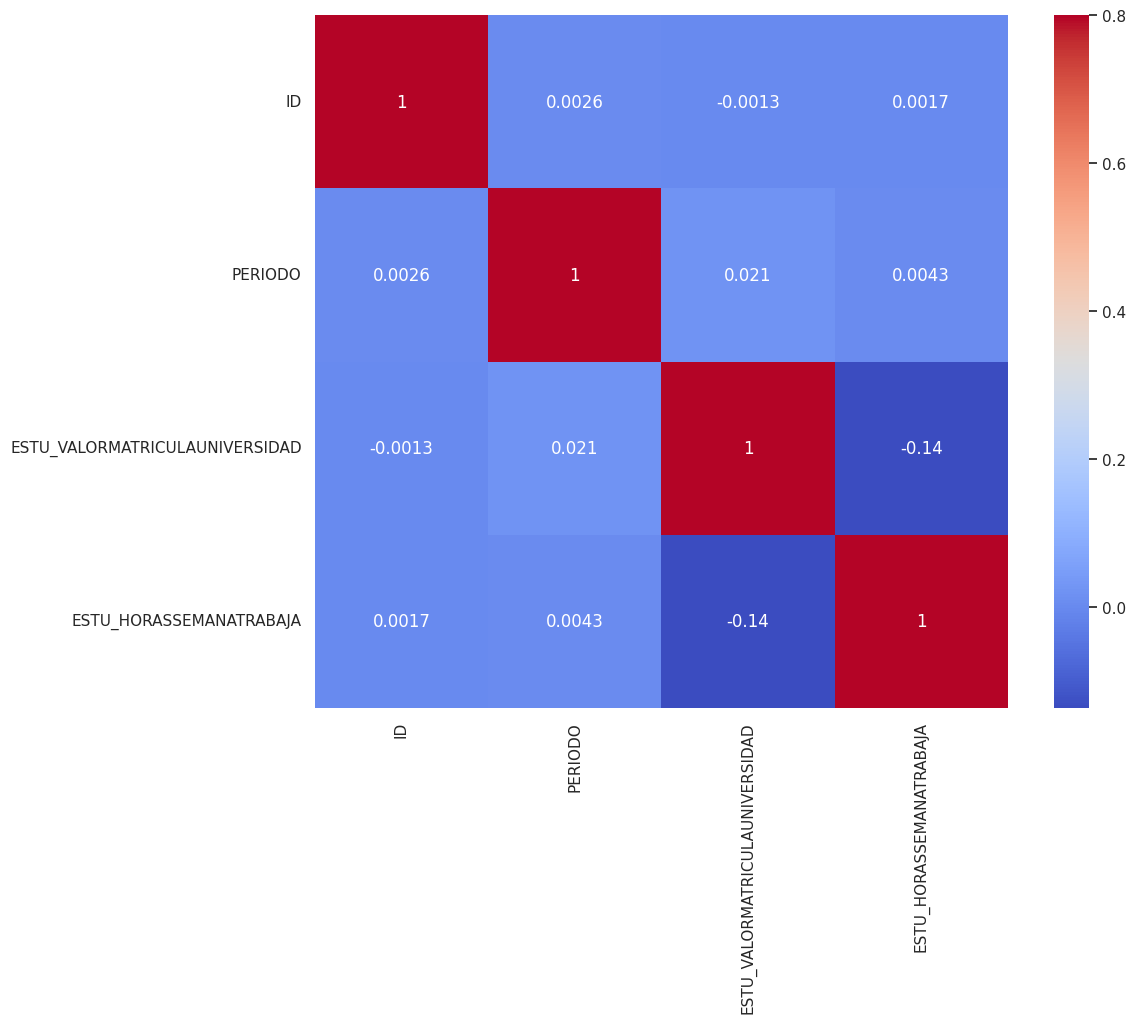

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_cols = z.select_dtypes(include=['int64', 'float64'])

# Crear la matriz de correlación
corrmat = numeric_cols.corr()

# Crear la figura y el heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()


In [ ]:
# Inspeccionar las columnas categóricas (no numéricas) en el DataFrame z
ccols = [i for i in z.columns if not i in z._get_numeric_data()]
print("Columnas categóricas:", ccols)



Columnas categóricas: ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL']


## En algunas de las columnas categóricas, los valores están mezclados entre tipos de datos diferentes (por ejemplo, cadenas de texto y números), lo que impide que np.unique() funcione correctamente.

## Necesitamos convertir todos los valores en esas columnas categóricas a cadenas de texto (string), para evitar la mezcla de tipos de datos que genera el error.

# INSPECCIÓN VARIABLES CATEGÓRICAS

In [ ]:
import numpy as np

# Asegurarnos de que todos los valores en las columnas categóricas sean cadenas de texto
for c in ccols:
    # Convertir los valores de la columna a string antes de encontrar los únicos
    z[c] = z[c].astype(str)

# Inspeccionar los valores únicos de las variables categóricas
for c in ccols:
    print(f"{c:>20}", np.unique(z[c].dropna()))



 ESTU_PRGM_ACADEMICO ['3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES'
 'ACTIVIDAD FISICA Y DEPORTE' 'ACUICULTURA' 'ADMINISTRACION'
 'ADMINISTRACION  FINANCIERA' 'ADMINISTRACION & SERVICIO'
 'ADMINISTRACION AERONAUTICA' 'ADMINISTRACION AGROPECUARIA'
 'ADMINISTRACION AMBIENTAL'
 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES'
 'ADMINISTRACION BANCARIA Y FINANCIERA' 'ADMINISTRACION COMERCIAL'
 'ADMINISTRACION COMERCIAL Y DE MERCADEO'
 'ADMINISTRACION DE COMERCIO EXTERIOR' 'ADMINISTRACION DE EMPRESAS'
 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL'
 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES'
 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS'
 'ADMINISTRACION DE EMPRESAS COMERCIALES'
 'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES'
 'ADMINISTRACION DE EMPRESAS TURISTICA'
 'ADMINISTRACION DE EMPRESAS TURISTICAS'
 'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS Y FINANZAS'
 'ADMINISTRACION DE GEST

Conteo de valores para la columna programa académico: z[c].value_counts(): Este método cuenta la frecuencia de cada valor único en la columna ESTU_PRGM_ACADEMICO.

In [ ]:
# Usar la columna 'ESTU_PRGM_ACADEMICO' para contar los valores
c = "ESTU_PRGM_ACADEMICO"

# Contar los valores en la columna 'ESTU_PRGM_ACADEMICO'
value_counts = z[c].value_counts()

# Mostrar el conteo de valores
print(value_counts)



ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64


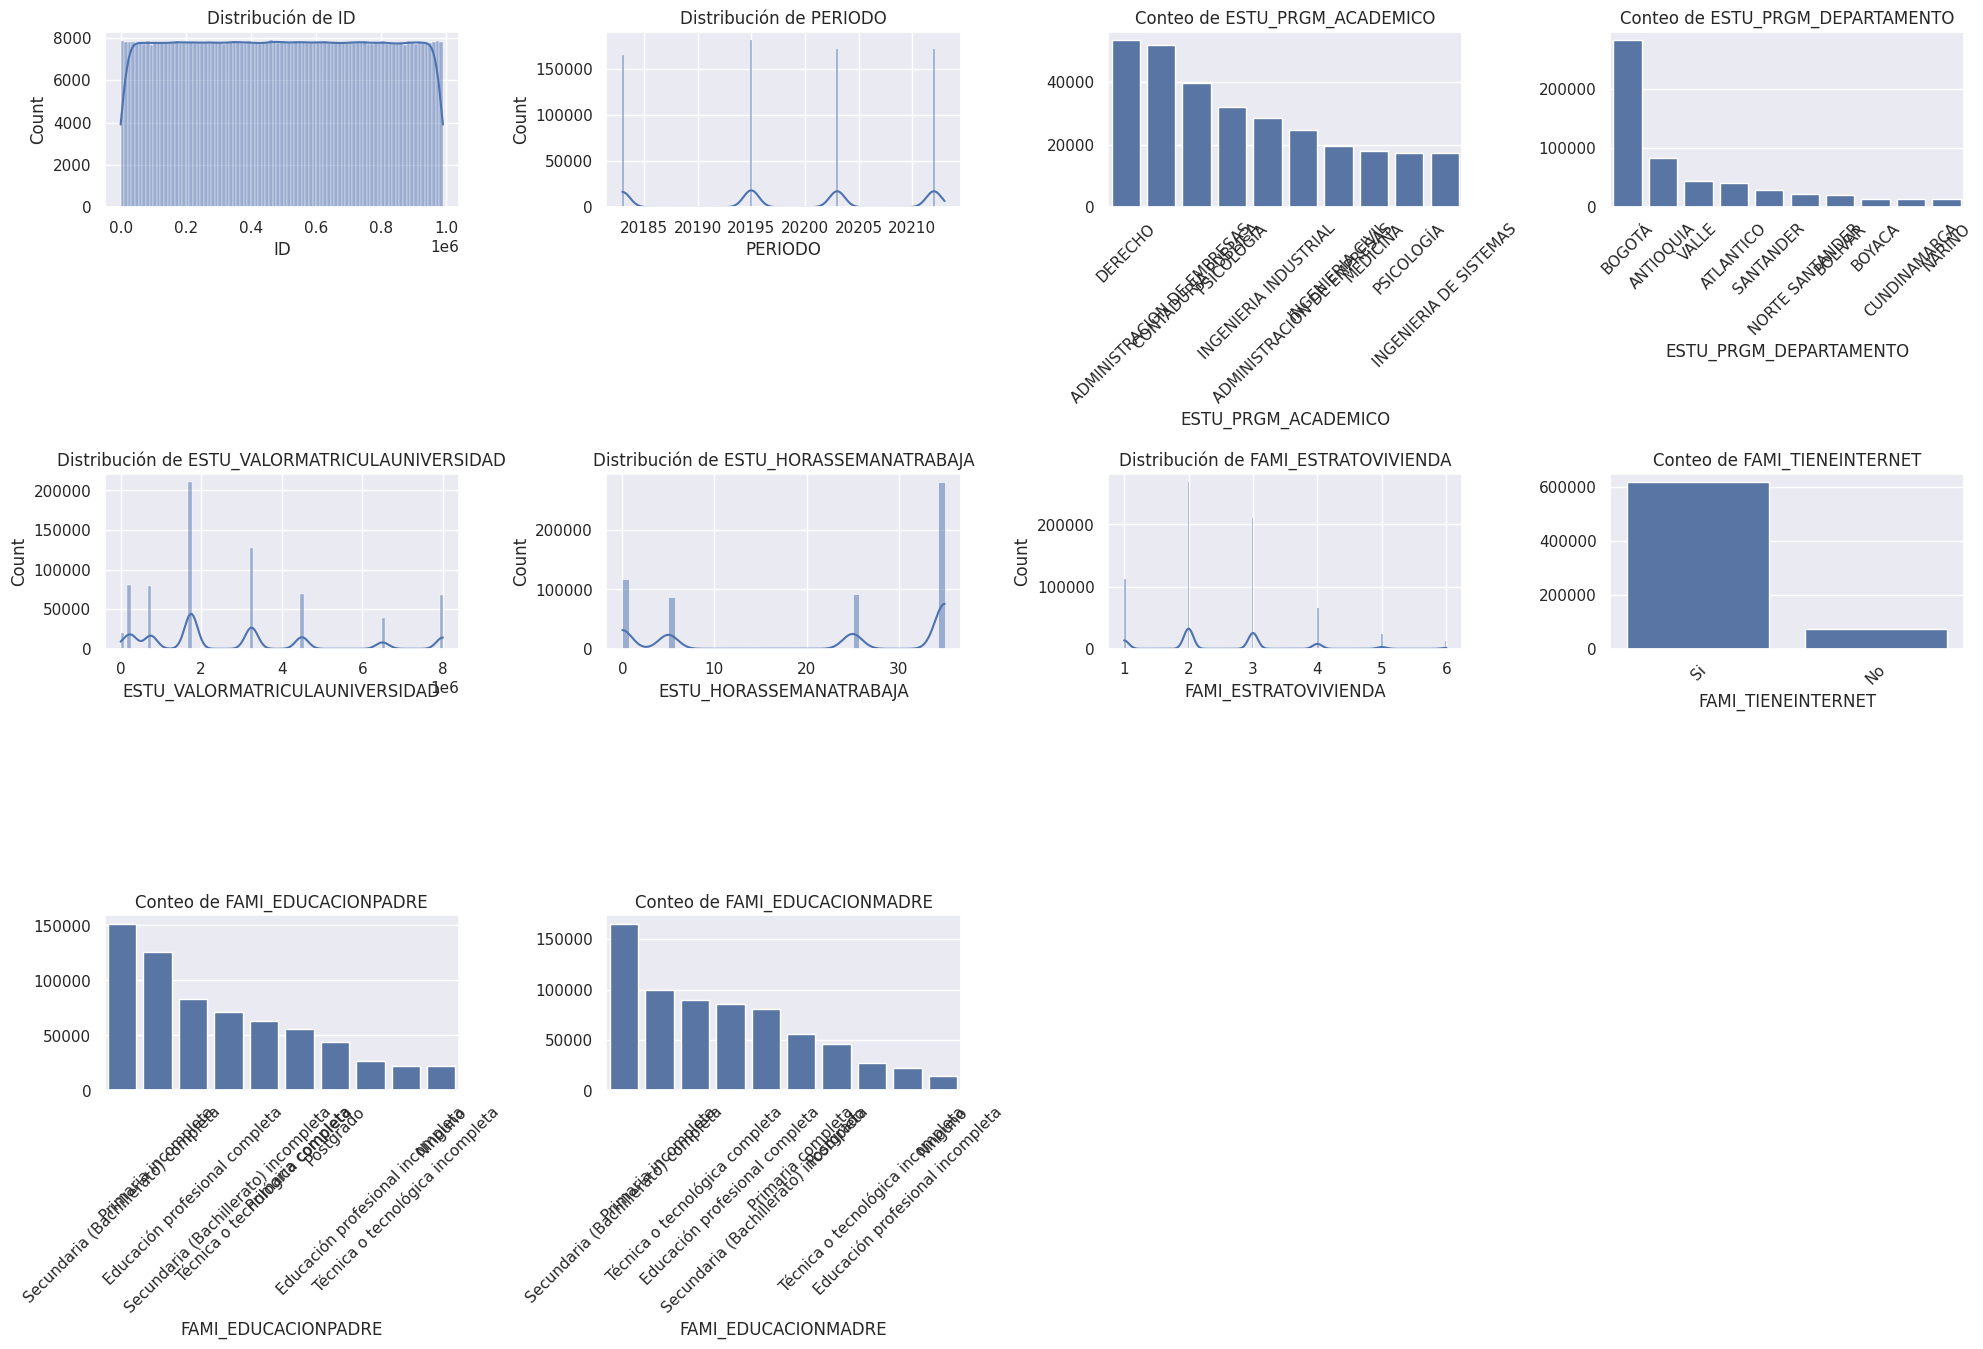

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Limitar a las primeras 10 columnas para probar (puedes ajustar el número)
subset_cols = z.columns[:10]

# Ajustar el tamaño de la figura según el número de columnas seleccionadas
plt.figure(figsize=(20, 4 * ((len(subset_cols) - 1) // 2 + 1)))

# Limitar el número máximo de categorías a visualizar (por ejemplo, las 10 más frecuentes)
max_categories = 10

# Bucle para graficar cada columna individualmente
for i, c in enumerate(subset_cols):
    plt.subplot((len(subset_cols) - 1) // 2 + 1, 4, i+1)

    # Verificar si la columna es categórica o numérica
    if z[c].dtype == 'object':  # Si es categórica
        # Contar los valores y limitar a las 10 categorías más frecuentes
        vc = z[c].value_counts().nlargest(max_categories)
        sns.barplot(x=vc.index, y=vc.values)  # Cambiar a `barplot` en lugar de `countplot`
        plt.title(f"Conteo de {c}")
        plt.xticks(rotation=45)
    elif z[c].dtype in ['int64', 'float64']:  # Si es numérica
        sns.histplot(z[c], kde=True)
        plt.title(f"Distribución de {c}")

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()








<ipython-input-102-f2925cee31b5>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


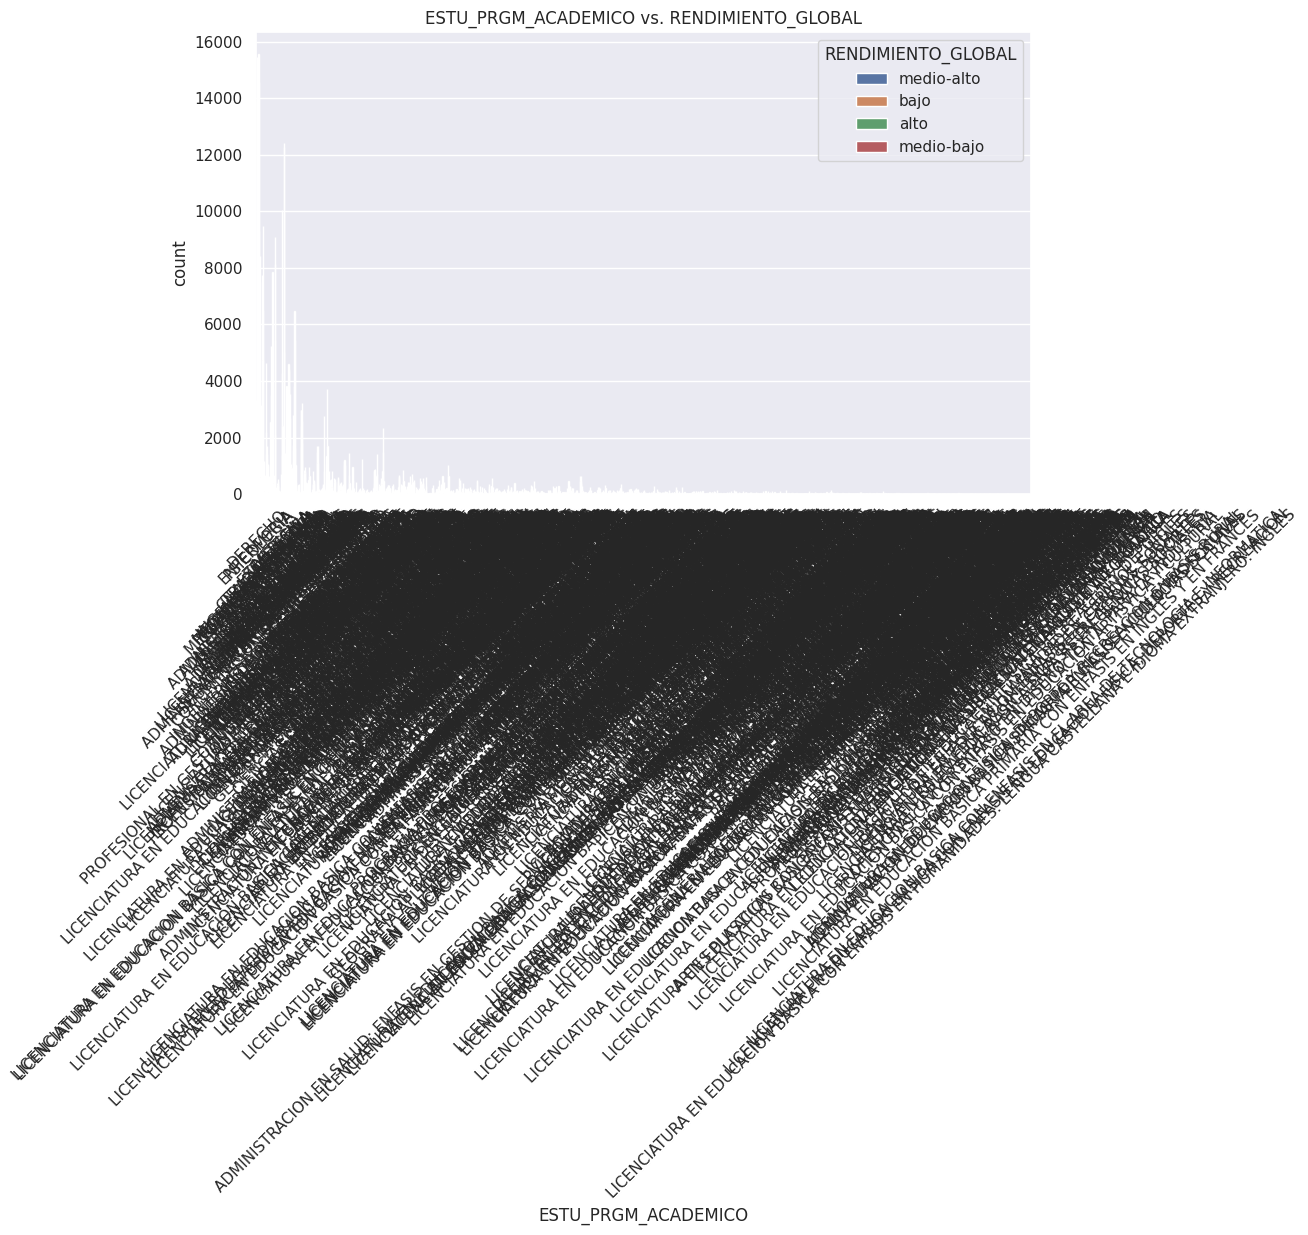

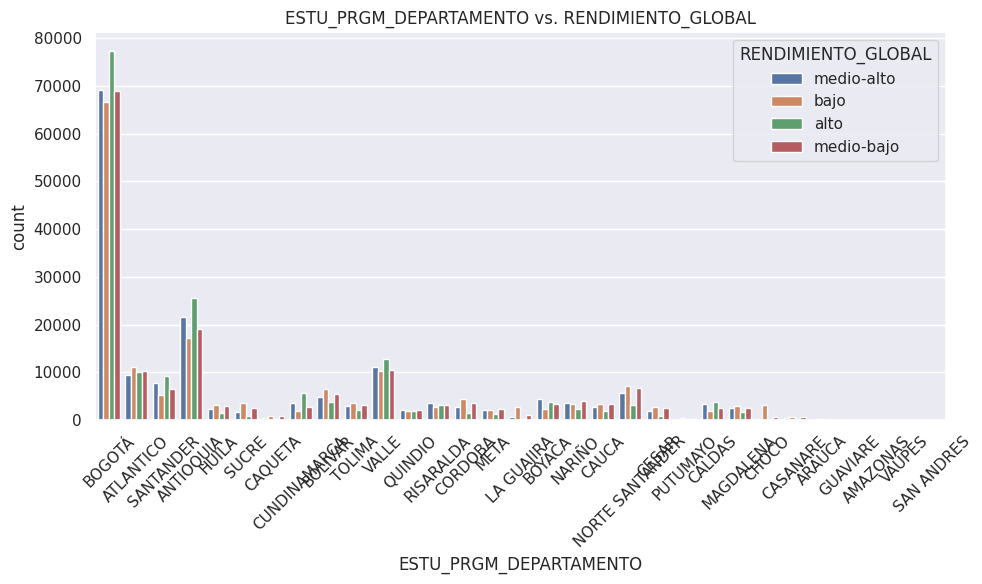

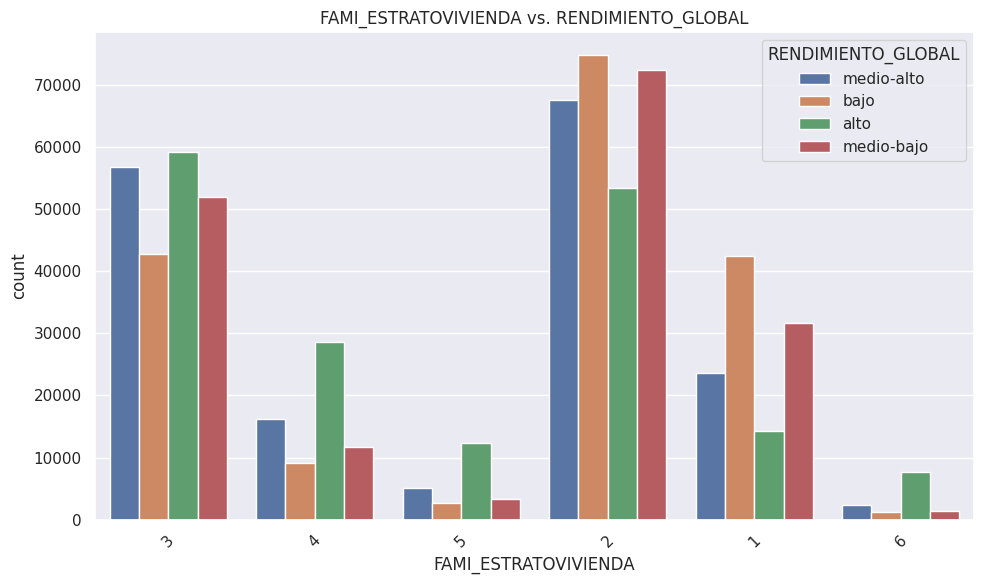

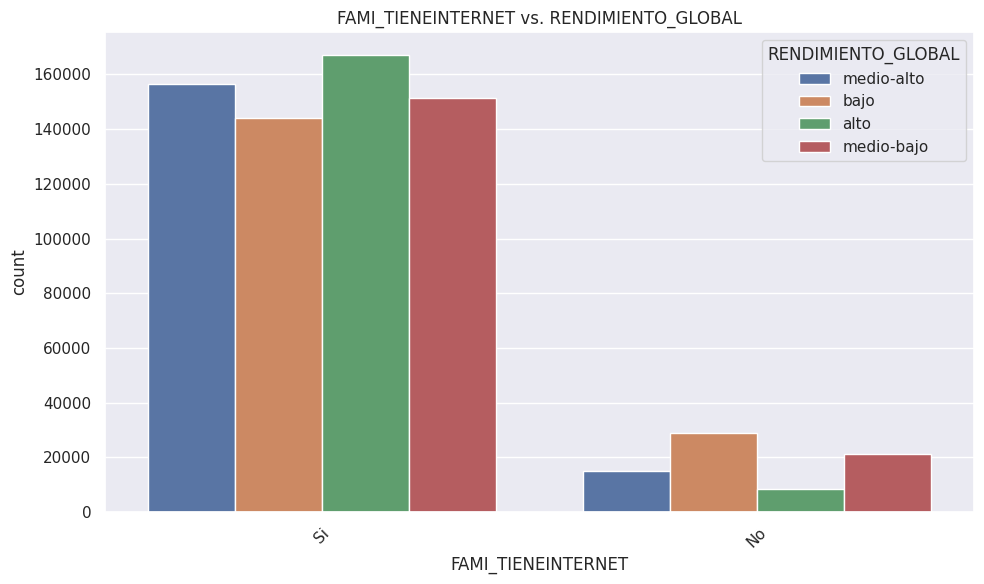

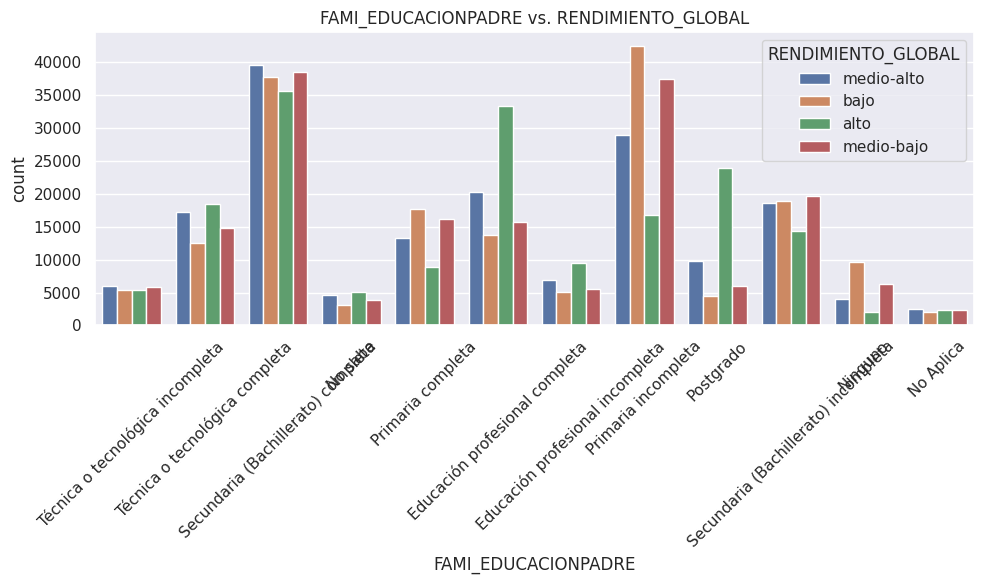

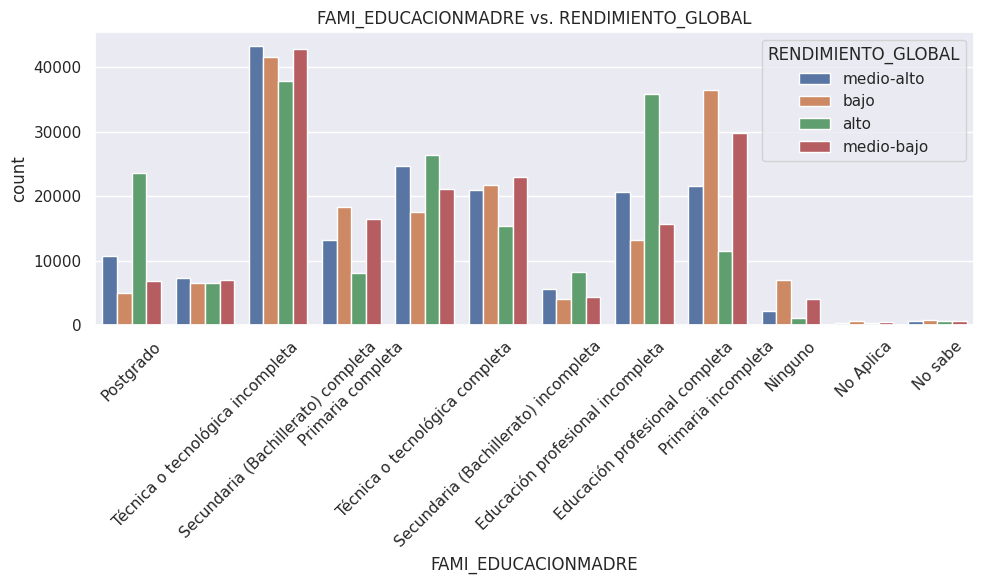

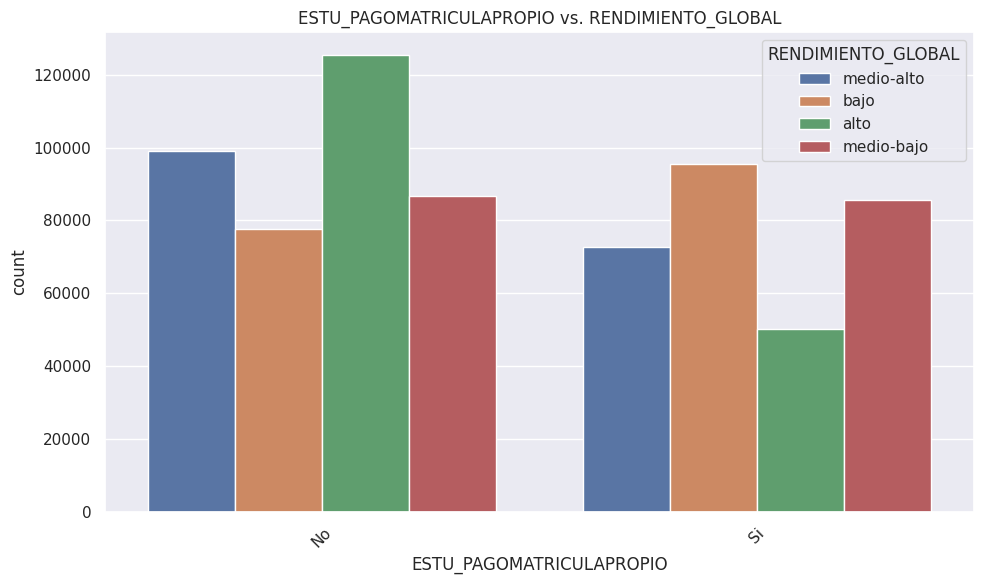

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Listado de columnas categóricas
categorical_cols = ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO']

# Crear gráficos comparando cada columna categórica con RENDIMIENTO_GLOBAL
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=z, x=col, hue='RENDIMIENTO_GLOBAL')
    plt.title(f'{col} vs. RENDIMIENTO_GLOBAL')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
